In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
pd.set_option("display.max_rows", 1000) 
pd.set_option("display.max_columns", 1000)

In [3]:
fires = pd.read_csv("forestfires (1).csv")    #reading the dataset
fires.head(20)    #show the first 15 instances of dataset


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
#show the last 10 instances of dataset
fires.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [5]:
#changing days into numeric quantity because machine learning model deals with numbers
fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

#changing month into numeric quantity
fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

#showing first 10 instances of dataset after converting days and months into numbers
fires.head(15) 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
#generate descriptive statistics of each attribute
fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
fires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [9]:
#given area of land burnt, but we have to predict if there is fire or not so changing values of area to 0 and 1 only
#here 0 represet there is not fire and 1 represent fire, changing all values of area which are greater than 0 to 1
fires['area'].values[fires['area'].values > 0] = 1

#renaming the area attribute to output for clear understanding
fires = fires.rename(columns={'area': 'output'})
fires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
#Compute pairwise correlation of columns
fires.corr()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.035587


In [11]:
#sorting to see which attribute is correlated more to attribut "output" 
fires.corr()['output'].sort_values()
#we can see that attribute "month" is the mostly correlated  to attribute "output"

day      -0.042970
RH       -0.035587
rain      0.025550
ISI       0.035663
wind      0.055702
Y         0.056892
X         0.062491
DMC       0.062672
FFMC      0.073823
temp      0.076047
DC        0.096724
month     0.130329
output    1.000000
Name: output, dtype: float64

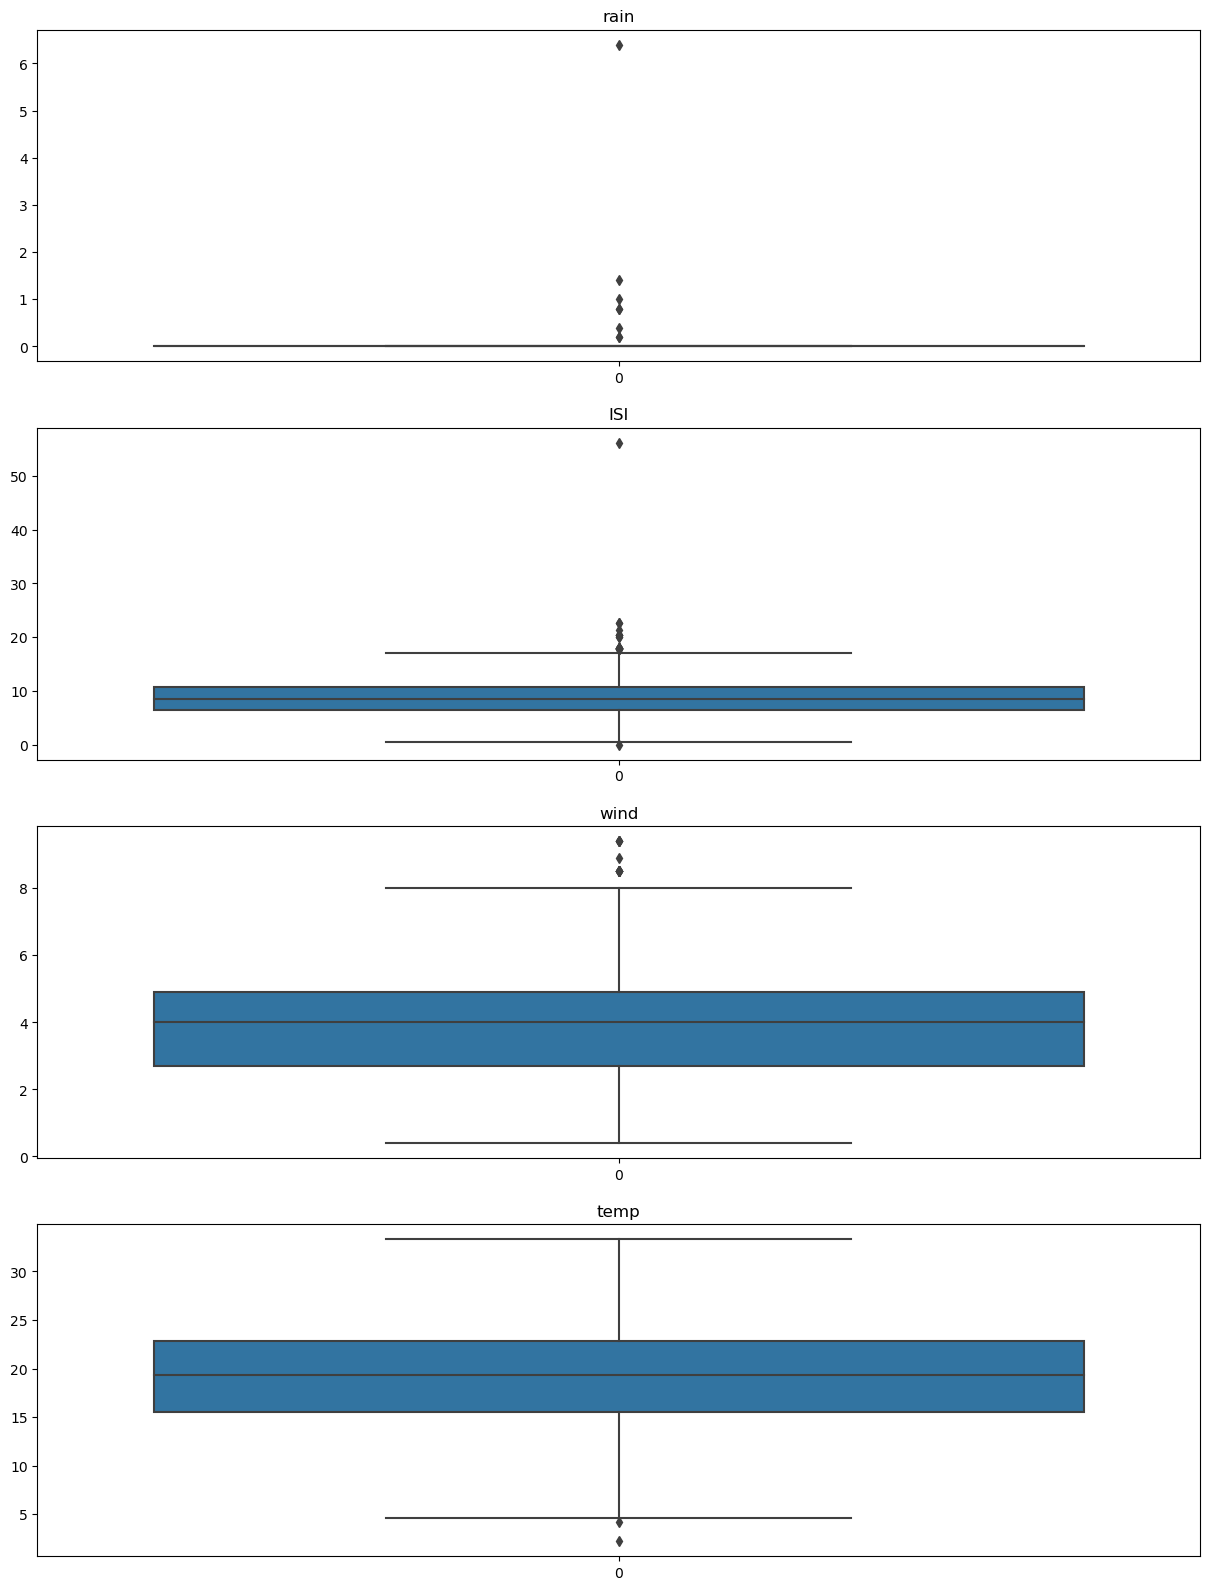

In [12]:
import seaborn as sns
plt.figure(figsize = (15,25))

plt.subplot(5,1,1)
sns.boxplot(fires['rain'] )
plt.title('rain')

plt.subplot(5,1,2)
sns.boxplot(fires['ISI'] )
plt.title('ISI')

plt.subplot(5,1,3)
sns.boxplot(fires['wind'])
plt.title('wind')

plt.subplot(5,1,4)
sns.boxplot(fires['temp'])
plt.title('temp')



plt.show()

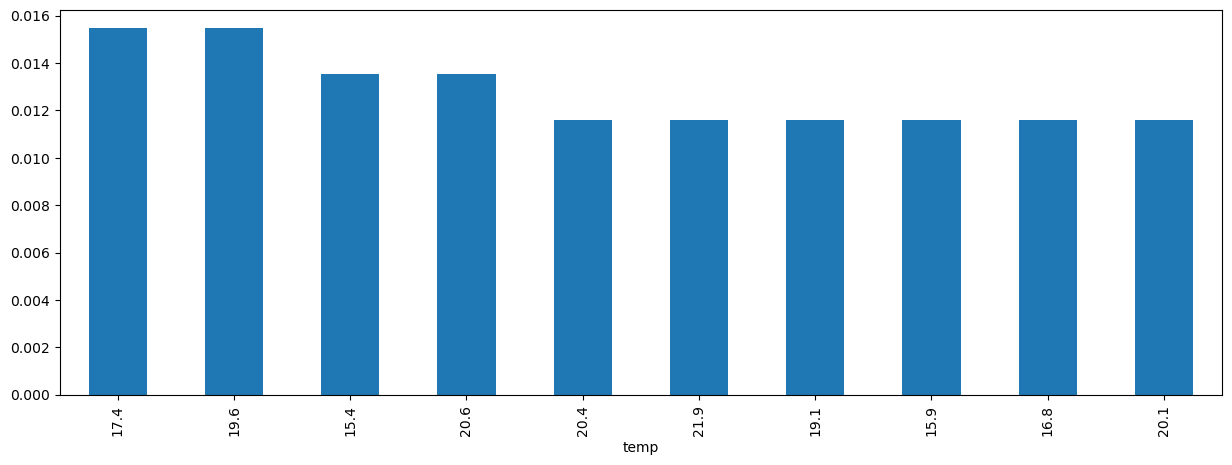

In [13]:
plt.figure(figsize = (15,5))
fires['temp'].value_counts(normalize = True).head(10).plot.bar()
plt.show()

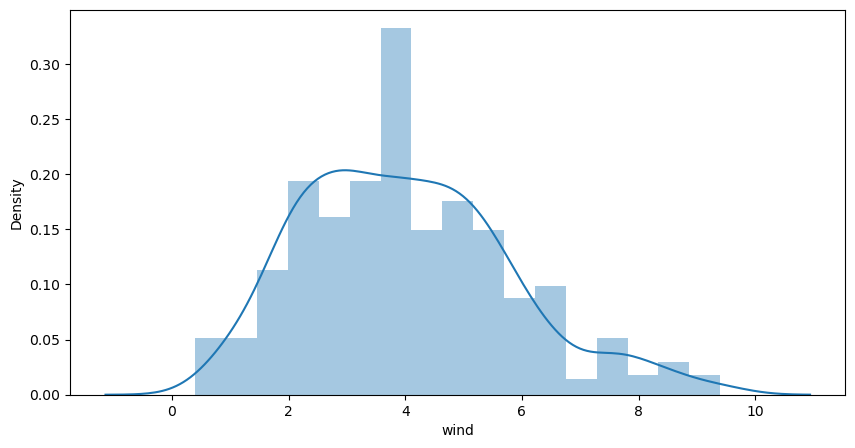

In [14]:
plt.figure(figsize = (10,5))
sns.distplot(fires['wind'])
plt.show()

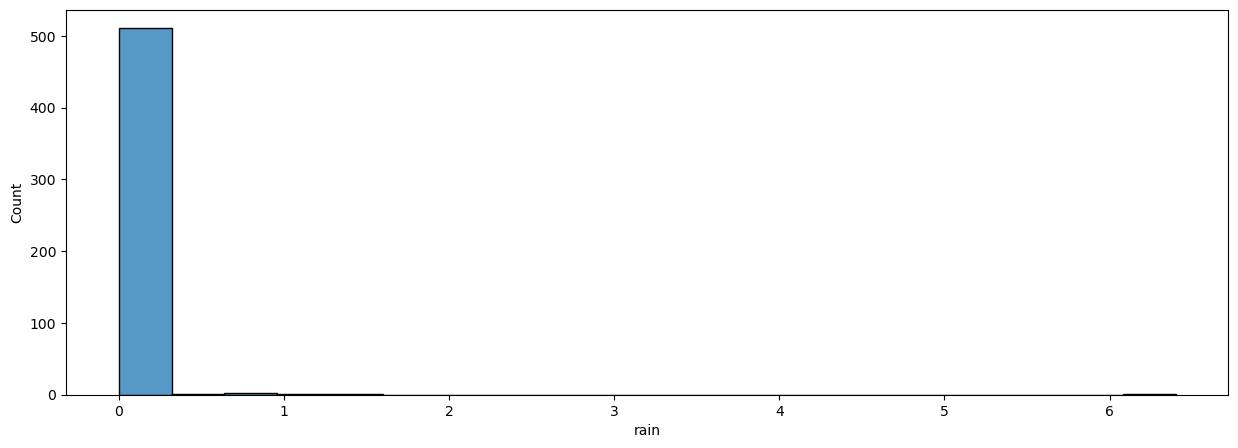

In [15]:
plt.figure(figsize = (15,5))
sns.histplot(fires['rain'] , bins = 20)
plt.show()

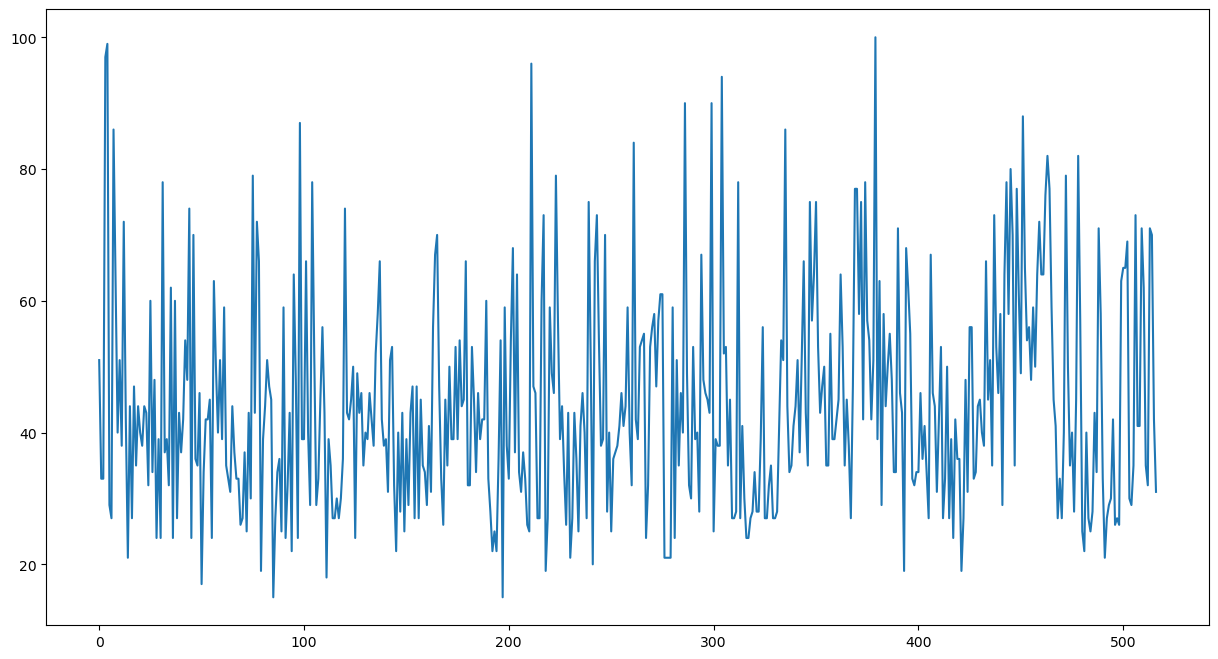

In [16]:
plt.figure(figsize = (15,8))
plt.plot(fires['RH'])
plt.show()

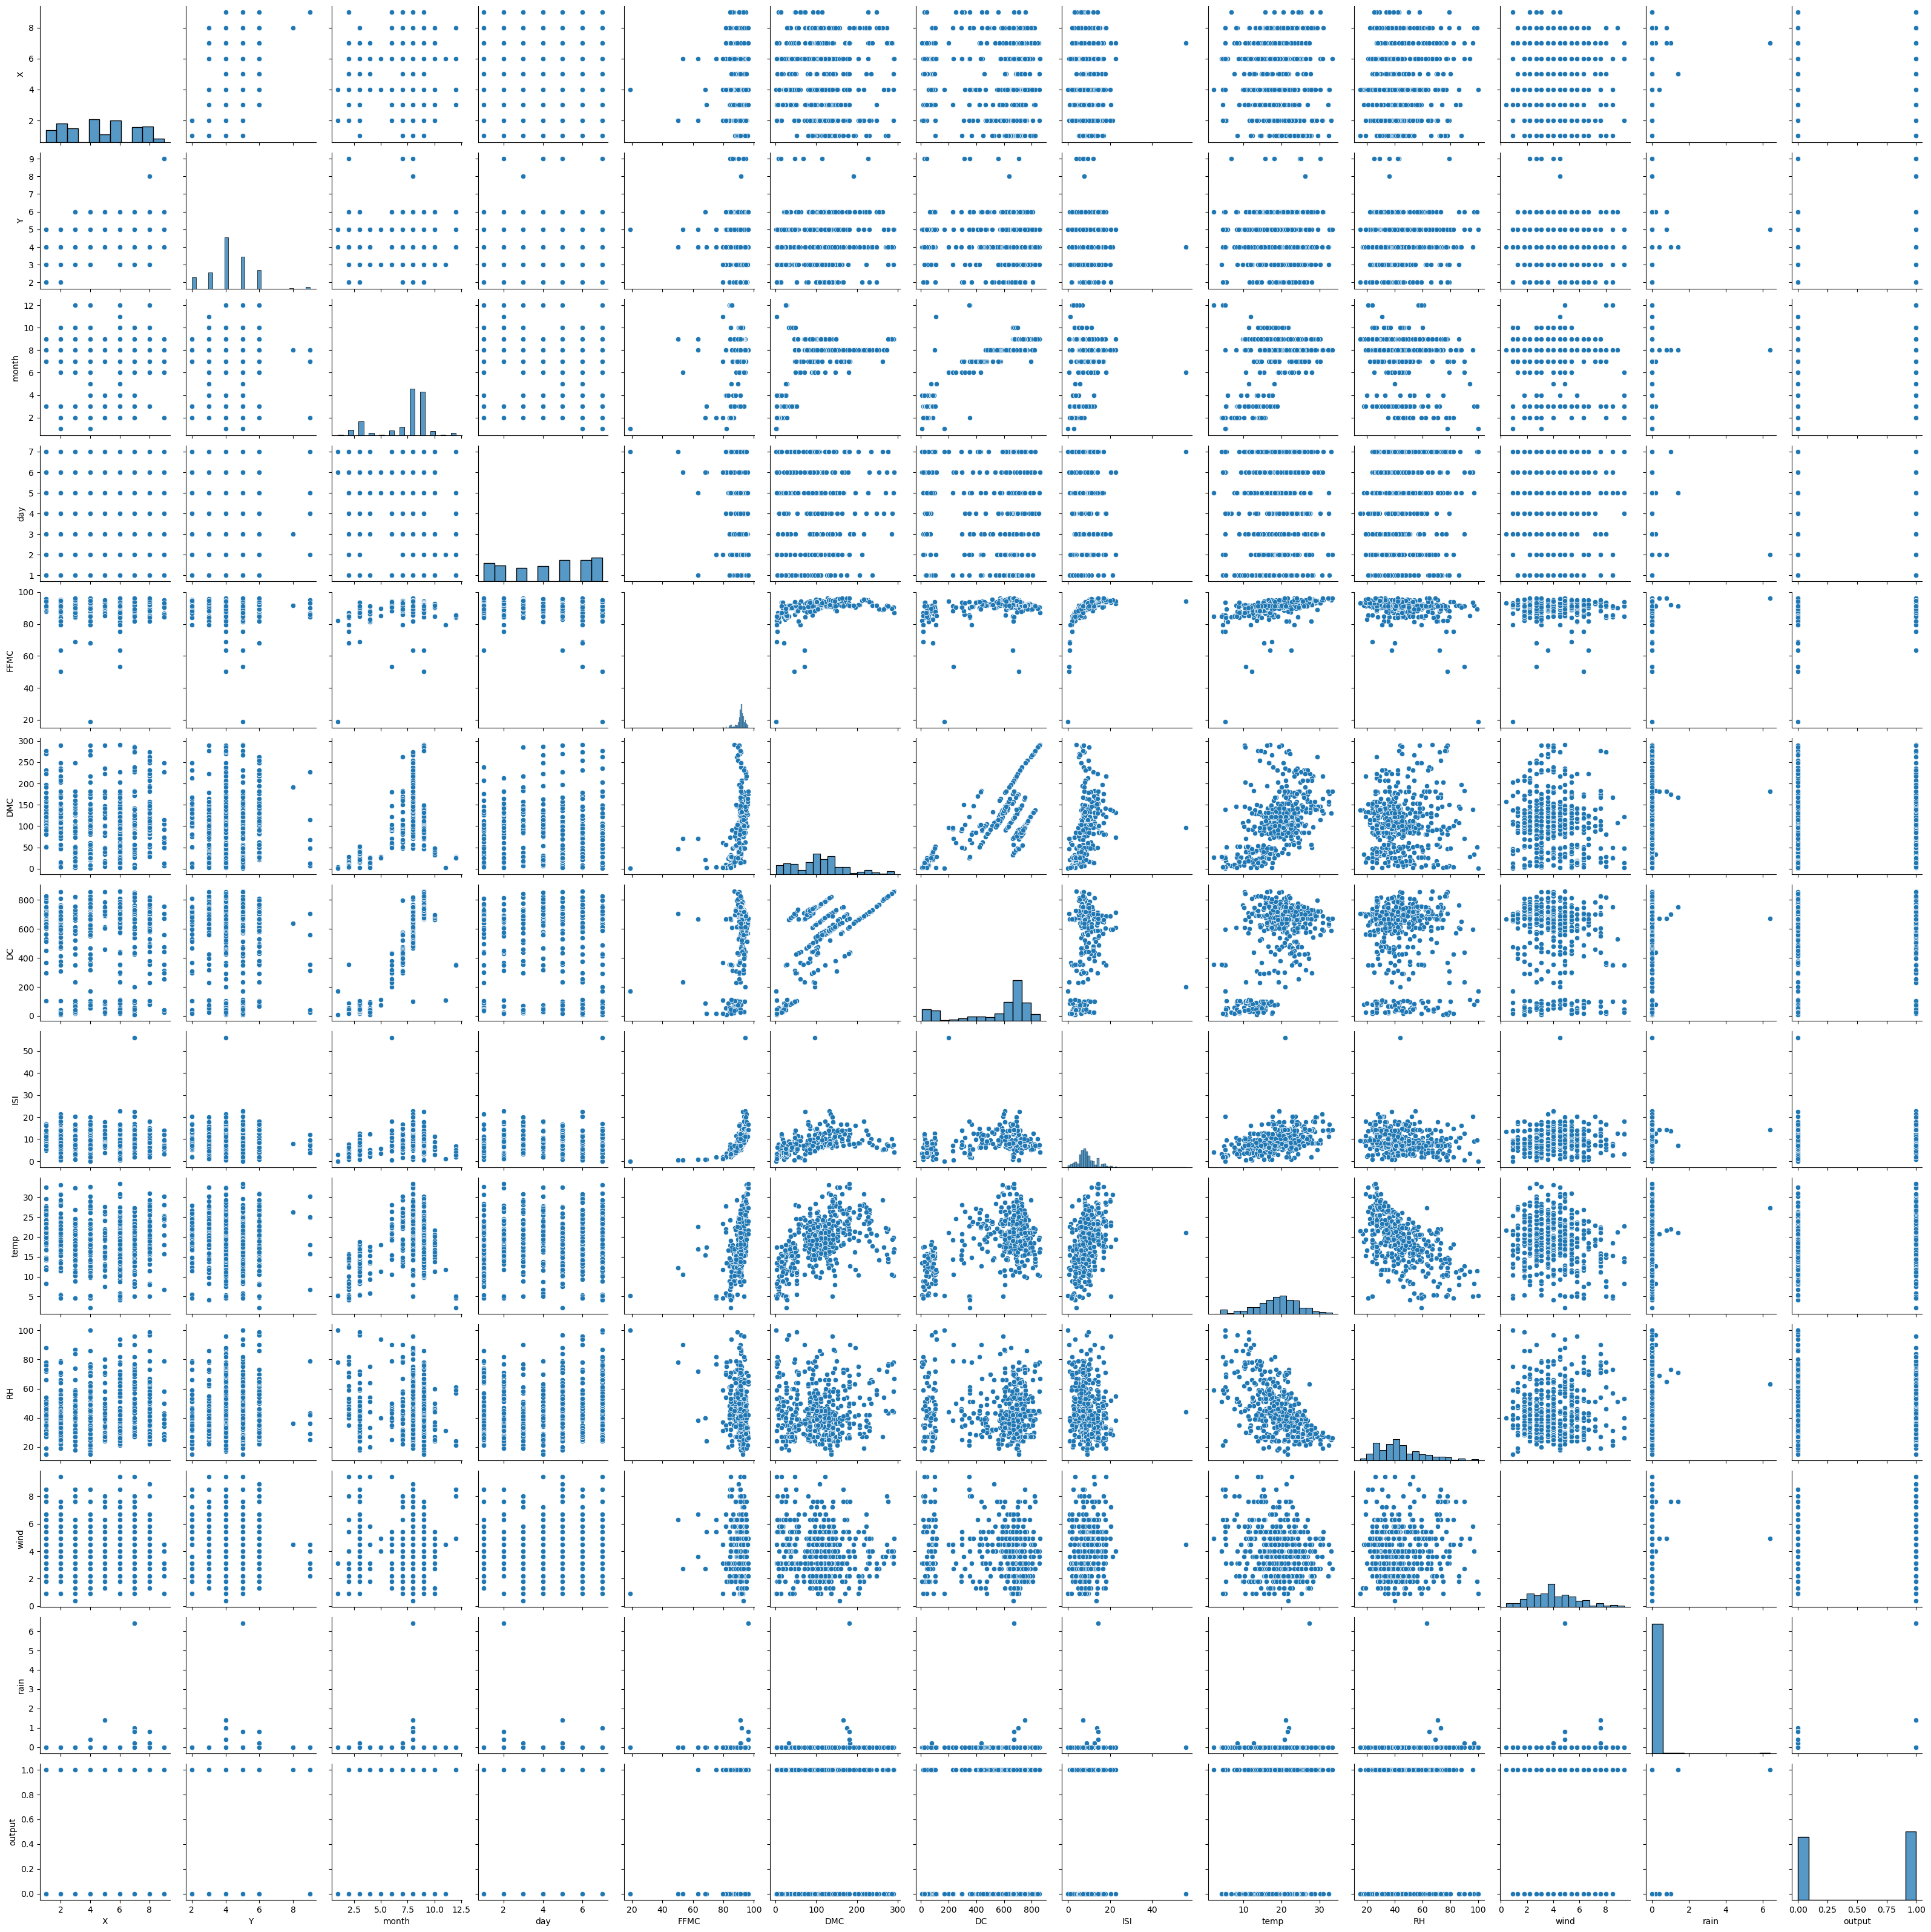

In [17]:
sns.pairplot(fires)

<Figure size 1000x800 with 0 Axes>

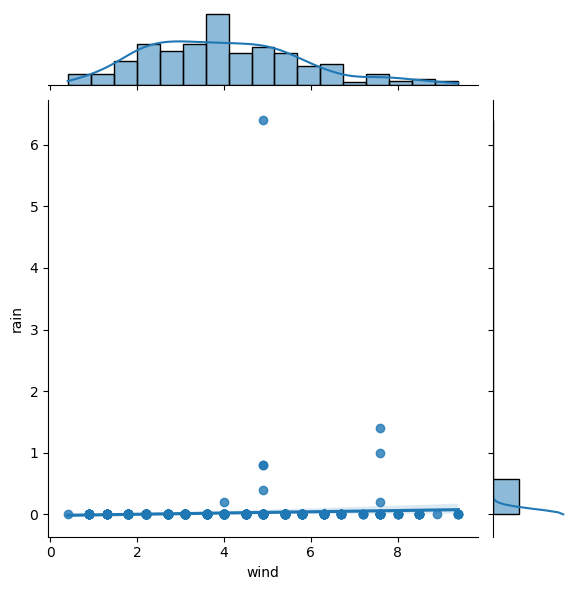

In [18]:
plt.figure(figsize = (10,8))
sns.jointplot(x = fires['wind'] , y = fires['rain'] , kind = 'reg')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
#standardization of data
#removing the mean and scaling it to unit variance
#score=(x-mean)/std
scaler = StandardScaler()
#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(fires.drop('output',axis=1))

scaled_features = scaler.transform(fires.drop('output',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=fires.columns[:-1])
df_feat.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [20]:
from sklearn.model_selection import train_test_split
X = df_feat
y = fires['output']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=200)

# Logistic Regression

In [21]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

predictions = logistic_model.predict(X_test)

#finding precision,recall,accuracy
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Precision: 0.5462184873949579
Recall: 0.7142857142857143
Accuracy: 0.5580110497237569
[[36 54]
 [26 65]]
              precision    recall  f1-score   support

         0.0       0.58      0.40      0.47        90
         1.0       0.55      0.71      0.62        91

    accuracy                           0.56       181
   macro avg       0.56      0.56      0.55       181
weighted avg       0.56      0.56      0.55       181



## Prediction

In [22]:
#prediction using logistic regression
class_label={1:'There is Fire',0:'There is no fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]


y_predict=logistic_model.predict(x_new)
print(class_label[y_predict[0]])

There is no fire


# KNN

In [23]:
#importing k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=1)
k_nearest_neighbor_model.fit(X_train,y_train)
pred = k_nearest_neighbor_model.predict(X_test)

Text(0, 0.5, 'Error Rate')

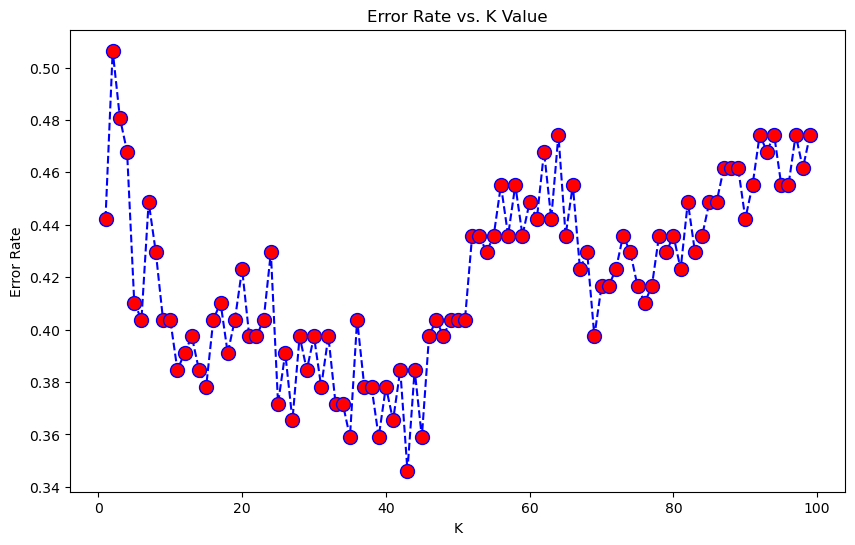

In [39]:
error_rate = []
for i in range(1,100):
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=i)
    k_nearest_neighbor_model.fit(X_train,y_train)
    pred_i = k_nearest_neighbor_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[42 48]
 [42 49]]


              precision    recall  f1-score   support

         0.0       0.50      0.47      0.48        90
         1.0       0.51      0.54      0.52        91

    accuracy                           0.50       181
   macro avg       0.50      0.50      0.50       181
weighted avg       0.50      0.50      0.50       181



In [26]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[37 53]
 [34 57]]


              precision    recall  f1-score   support

         0.0       0.52      0.41      0.46        90
         1.0       0.52      0.63      0.57        91

    accuracy                           0.52       181
   macro avg       0.52      0.52      0.51       181
weighted avg       0.52      0.52      0.51       181



In [27]:
knn.score(X_test, y_test)

0.5193370165745856

In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.5193370165745856
Precision: 0.5181818181818182
Recall: 0.6263736263736264


## Prediction

In [29]:
#prediction using knn
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

On Fire


# SVM

In [30]:
# Support Vector Machine
from sklearn.svm import SVC

# fit a SVM model to the data

X = fires.drop('output', axis=1)
y = fires['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))



              precision    recall  f1-score   support

         0.0       0.65      0.29      0.40        69
         1.0       0.61      0.87      0.72        87

    accuracy                           0.62       156
   macro avg       0.63      0.58      0.56       156
weighted avg       0.62      0.62      0.58       156

[[20 49]
 [11 76]]
Accuracy: 0.6153846153846154
Precision: 0.608
Recall: 0.8735632183908046


In [31]:
#prediction using svm
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=svc.predict(x_new)
print(classes[y_predict[0]])

On Fire


# Decision Tree

In [32]:
#import decision trees
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = fires.drop('output', axis=1)
y = fires['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

# make predictions
predicted = d_tree.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.47      0.41      0.43        69
         1.0       0.57      0.63      0.60        87

    accuracy                           0.53       156
   macro avg       0.52      0.52      0.52       156
weighted avg       0.53      0.53      0.53       156

[[28 41]
 [32 55]]
Accuracy: 0.532051282051282
Precision: 0.5729166666666666
Recall: 0.632183908045977


In [33]:
#prediction using decision tree
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=d_tree.predict(x_new)
print(classes[y_predict[0]])

On Fire


# Naive Bayes

In [34]:
#import naive bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

X = fires.drop('output', axis=1)
y = fires['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# fit a Naive Bayes model to the data
G_NB = GaussianNB()
G_NB.fit(X_train,y_train)
print(G_NB)
# make predictions

predict = G_NB.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))



GaussianNB()
              precision    recall  f1-score   support

         0.0       0.45      0.80      0.58        69
         1.0       0.59      0.23      0.33        87

    accuracy                           0.48       156
   macro avg       0.52      0.51      0.45       156
weighted avg       0.53      0.48      0.44       156

[[55 14]
 [67 20]]
Accuracy: 0.4807692307692308
Precision: 0.5882352941176471
Recall: 0.22988505747126436


In [35]:
#prediction using naive bayes
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=G_NB.predict(x_new)
print(classes[y_predict[0]])

On Fire


# Random Forest

In [36]:
#import random forest
from sklearn.ensemble import RandomForestClassifier
X = fires.drop('output', axis=1)
y = fires['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# fit a Naive Bayes model to the data
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
# print(random_forest)
# make predictions

predict = random_forest.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))



              precision    recall  f1-score   support

         0.0       0.50      0.58      0.54        69
         1.0       0.62      0.54      0.58        87

    accuracy                           0.56       156
   macro avg       0.56      0.56      0.56       156
weighted avg       0.57      0.56      0.56       156

[[40 29]
 [40 47]]
Accuracy: 0.5576923076923077
Precision: 0.618421052631579
Recall: 0.5402298850574713


In [37]:
#prediction using random forest
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=random_forest.predict(x_new)
print(classes[y_predict[0]])

On Fire
